In [1]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)

start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
    c = a + b
print(time() - start)

0.02022242546081543


In [3]:
#3.2
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

num_inputs=2
num_examples=1000
true_w = [2, -3.4]
true_b = 4.2
features=torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

/tmp/ipykernel_26107/3594474859.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


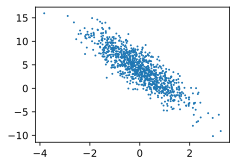

In [13]:
#d2lzh_pytorch包
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize

set_figsize()
#1：点的大小 
# 参考：https://blog.csdn.net/AnneQiQi/article/details/64125186
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [16]:
def data_iter(batch_size,feautes,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        #indices 表示索引 (十个)（每隔十个数字的随机是个数字）
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        # yiels 参考 迭代生成器
        # https://www.runoob.com/w3cnote/python-yield-used-analysis.html
        yield features.index_select(0, j), labels.index_select(0, j)

In [17]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[ 2.5293e-01,  1.2223e-01],
        [-4.5077e-01,  5.0164e-05],
        [ 1.9872e+00,  3.2092e-01],
        [-1.9208e-01,  6.9656e-01],
        [ 7.3605e-02, -1.8124e-02],
        [-3.0754e-01, -5.0604e-01],
        [ 7.2734e-01, -1.1659e+00],
        [ 6.6776e-01, -1.4046e-01],
        [-4.7712e-01,  7.9594e-02],
        [-2.6433e-01, -2.7509e-01]]) tensor([4.3020, 3.2897, 7.0980, 1.4382, 4.3978, 5.3036, 9.6184, 5.9951, 2.9838,
        4.6142])
